Found 50000 images total.
Image paths have been randomly shuffled.

Successfully loaded 50000 images into a NumPy array.
Shape of the final NumPy array: (50000, 128, 128, 3)


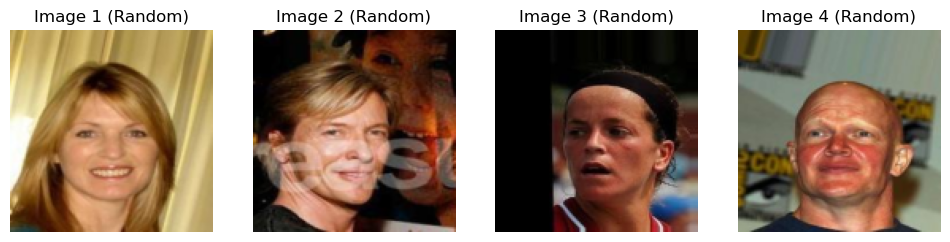

In [8]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random # <-- Import the random module

# Define the exact path to your dataset folder using a raw string (r"...")
data_dir = r"C:\Users\batch1\Downloads\Celebrity_Faces_Dataset"

# --- Reshape Parameters ---
TARGET_HEIGHT = 128
TARGET_WIDTH = 128
TARGET_SHAPE = (TARGET_WIDTH, TARGET_HEIGHT) # OpenCV expects (width, height) order for size

# 1. Find the paths for all image files in the directory
image_paths = glob.glob(os.path.join(data_dir, '*.jpg')) 

total_images_found = len(image_paths)
print(f"Found {total_images_found} images total.")

# --- ADDED: Shuffle the paths randomly ---
random.shuffle(image_paths) 
print("Image paths have been randomly shuffled.")


# 2. Load and Reshape all images using OpenCV
loaded_images_rgb = []
for path in image_paths:
    img_bgr = cv2.imread(path) 
    
    if img_bgr is not None:
        # Reshape the image
        img_resized_bgr = cv2.resize(img_bgr, TARGET_SHAPE, interpolation=cv2.INTER_AREA)
        
        # Convert BGR to RGB for consistent display in Matplotlib
        img_resized_rgb = cv2.cvtColor(img_resized_bgr, cv2.COLOR_BGR2RGB)
        
        loaded_images_rgb.append(img_resized_rgb)
    else:
        print(f"Error loading image: {path}")

# Convert the list of images into a single NumPy array
images_np = np.array(loaded_images_rgb)

print(f"\nSuccessfully loaded {len(images_np)} images into a NumPy array.")
print(f"Shape of the final NumPy array: {images_np.shape}")


# 3. Display a few images to confirm loading and shape
# These 4 images will be different every time you run the entire cell block:
if len(images_np) > 0:
    plt.figure(figsize=(12, 4))
    for i in range(min(4, len(images_np))):
        plt.subplot(1, 4, i + 1)
        plt.imshow(images_np[i])
        plt.title(f"Image {i+1} (Random)")
        plt.axis('off')
    plt.show()
